## Report: act_report

## Introduction

WeRateDogs is a twitter account that rates pictures of dogs, typically on a scale out of ten and typically giving the dog a score higher than ten. For this report, we collected twitter data for the WeRateDogs account to answer questions about the history of the account. In this analysis we will attempt to answer the following three questions:

1. What is the typical ratio of dog ratings given (numerator / denomiator)?
2. Has the account become more popular over time, using the number of people favoriting the tweets?
3. What was typically used to send the tweets?

## Analysis

We're going to read in the twitter data with pandas and import matplotlib to aid in visualizations.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
tweet = pd.read_csv('twitter_archive_master.csv')

### Question 1: What is the typical ratio of dog ratings given?

To determine what the typical ratio of dog ratings, we can look at the distribution of the rating numerator divided by the rating denominator. From the histogram below, we can see that the majority of the ratios fall between 1 and 1.25. This would be equivalent to a rating of 10/10 to 12.5/10.

*Note that the range of the graph is set from 0 to 2. This is because there are outliers far to the right that make the bulk of the data shown in the plot below difficult to see.*

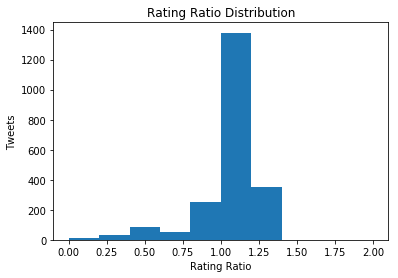

In [35]:
fig = plt.hist(tweet.rating_numerator / tweet.rating_denominator, bins=10, range=(0,2));
plt.xlabel("Rating Ratio");
plt.ylabel("Tweets");
plt.title("Rating Ratio Distribution");

### Question 2: Has the account become more popular over time?

To answer the question of whether the account has become more popular over time, we can use the use the number of people who have favorited each tweet as measurment. Based on the plot below, we can see a positive trend over time that indicates the account became more popular. The variance in the y axis seems to have also increased over time, but it looks like the lower variance in the earlier tweets may have been because the favorite counts were closer to zero and a zero favorite count is the bottom limit.

In [36]:
# timestamp needs to be converted back to datetime since we read in the csv
tweet.timestamp = pd.to_datetime(tweet.timestamp)

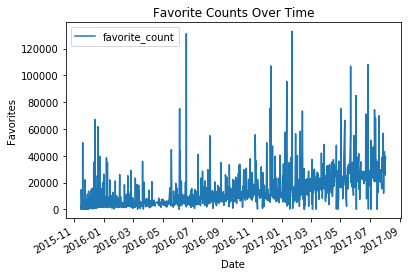

In [37]:
fig = tweet.plot(x="timestamp", y="favorite_count", title="Favorite Counts Over Time");
fig.set_xlabel("Date");
fig.set_ylabel("Favorites");

### Question 3: What was typically used to send the tweets?

To determine what was typically used to send the tweets, we can use the source variable in the tweet data to see where the tweet was sent. From the bar chart below, we can see that the vast majority of tweets were sent from an iPhone, totaling over 2000 tweets. After the iPhone, Vine is the second most used with a little less than a hundred tweets, then the Twitter Web Client and TweetDeck with only a few.

Text(0,0.5,'Tweet Source')

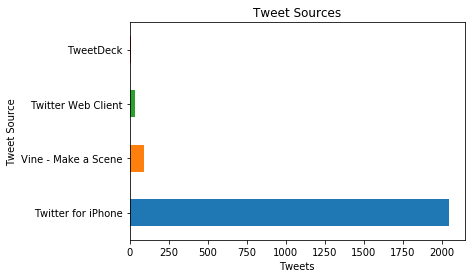

In [38]:
fig = tweet.source.value_counts().plot.barh(title="Tweet Sources");
fig.set_xlabel("Tweets")
fig.set_ylabel("Tweet Source")

## Conclusion

Using the twitter data from WeRateDogs, we were able to create visualizations to determine that the most common rating ratios fell between ratings of 10/10 and 12.5/10. We also determined that, based on the favorites count, the WeRateDogs account has become more popular over time. And Finally, we showed that the vast majority of tweets were sent from an iPhone, and Vinen, Twitter Web Client, and TweetDeck were also used, but far less often.
